In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import libraries
import pickle

import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random


In [5]:
with open("..\\datasets\gtsrb-traffic-sign-detection-pickle\\train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("..\\datasets\gtsrb-traffic-sign-detection-pickle\\valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("..\\datasets\gtsrb-traffic-sign-detection-pickle\\test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [6]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [7]:
X_train.shape
y_train.shape

(34799,)

Image Exploration

4

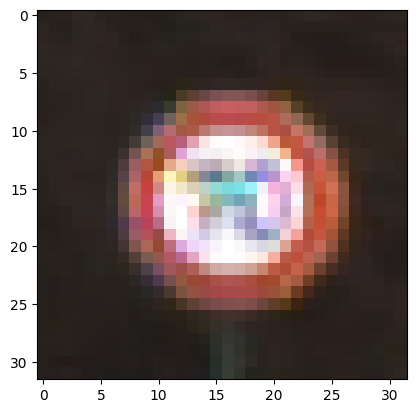

In [13]:
i = 7230
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

In [14]:
## Shuffle the dataset
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


In [16]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True)

In [17]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128


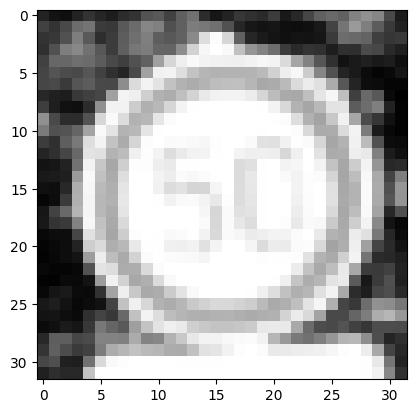

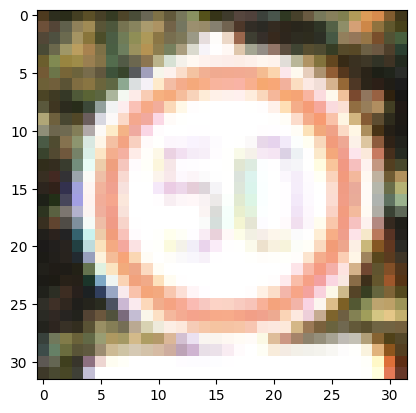

In [20]:
X_train_gray.shape
i = 10

plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])

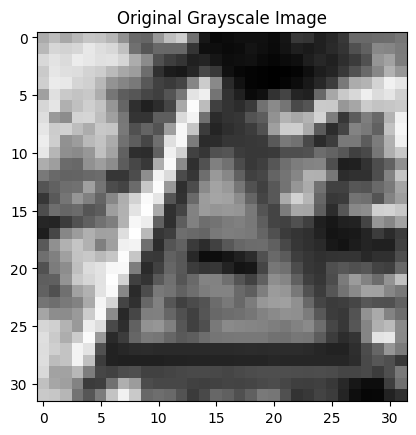

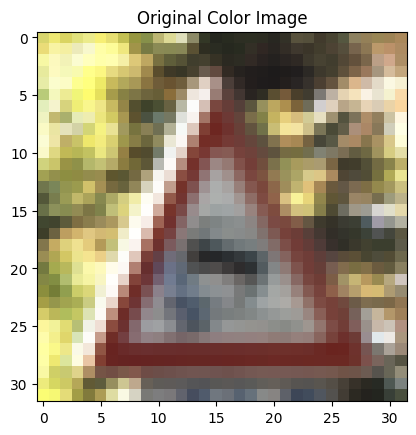

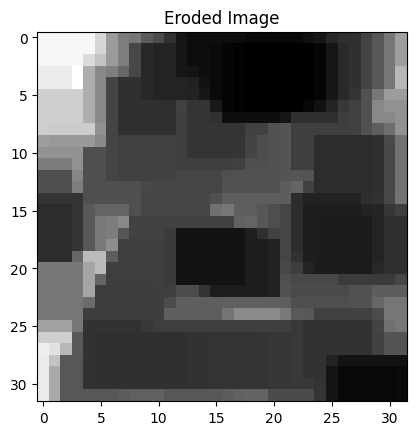

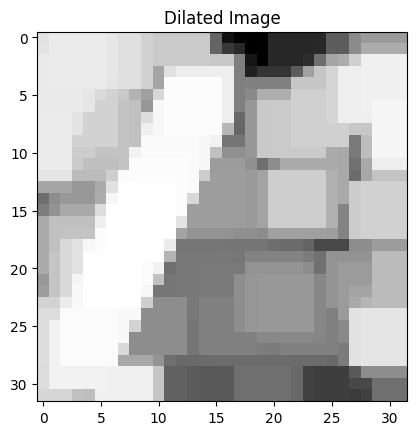

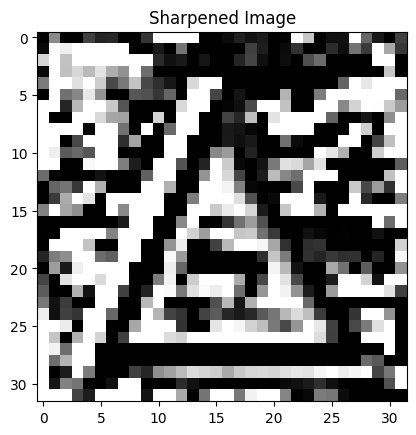

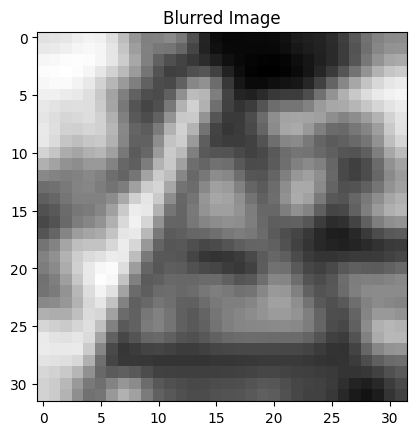

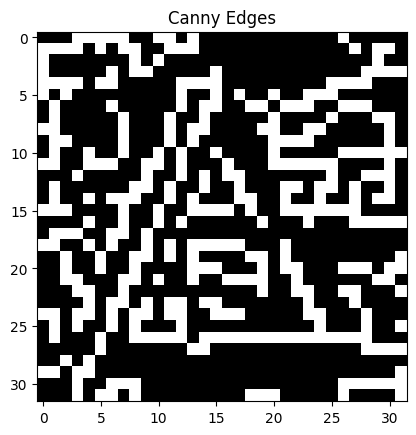

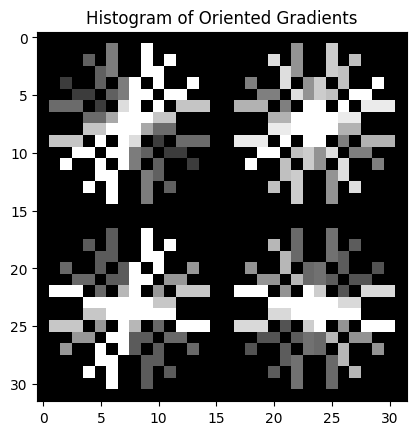

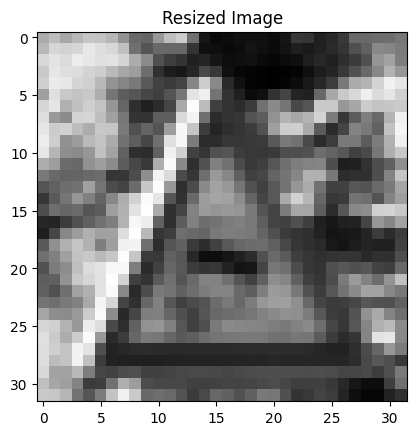

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Assuming X_train_gray and X_train are already defined and loaded

# Convert to uint8
i = 721
X_train_gray_uint8 = cv2.normalize(X_train_gray[i], None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Display the original grayscale image
plt.imshow(X_train_gray_uint8.squeeze(), cmap='gray')
plt.title("Original Grayscale Image")
plt.figure()

# Display the corresponding color image
plt.imshow(X_train[i])
plt.title("Original Color Image")
plt.show()

# Image Erosion
kernel = np.ones((5, 5), np.uint8)
eroded = cv2.erode(X_train_gray_uint8, kernel, iterations=1)
plt.imshow(eroded.squeeze(), cmap='gray')
plt.title("Eroded Image")
plt.show()

# Image Dilation
dilated = cv2.dilate(X_train_gray_uint8, kernel, iterations=1)
plt.imshow(dilated.squeeze(), cmap='gray')
plt.title("Dilated Image")
plt.show()

# Image Sharpening
kernel_sharpening = np.array([[-1, -1, -1],
                              [-1, 9, -1],
                              [-1, -1, -1]])
sharpened = cv2.filter2D(X_train_gray_uint8, -1, kernel_sharpening)
plt.imshow(sharpened.squeeze(), cmap='gray')
plt.title("Sharpened Image")
plt.show()

# Gaussian Blurring
blurred = cv2.GaussianBlur(X_train_gray_uint8, (5, 5), 0)
plt.imshow(blurred.squeeze(), cmap='gray')
plt.title("Blurred Image")
plt.show()

# Edge Detection using Canny
edges = cv2.Canny(X_train_gray_uint8, 100, 200)
plt.imshow(edges.squeeze(), cmap='gray')
plt.title("Canny Edges")
plt.show()

# Histogram of Oriented Gradients (HOG)
fd, hog_image = hog(X_train_gray_uint8, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=None)  # Corrected to 'None' for single channel
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

plt.imshow(hog_image_rescaled, cmap='gray')
plt.title("Histogram of Oriented Gradients")
plt.show()

# Image Resizing (resizing is repeated here for complete script context)
resized_image = cv2.resize(X_train_gray_uint8, (32, 32))  # Resize to 32x32
plt.imshow(resized_image.squeeze(), cmap='gray')
plt.title("Resized Image")
plt.show()


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Load and preprocess data
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Shuffle the dataset
X_train, y_train = shuffle(X_train, y_train)

# Convert to grayscale
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_validation_gray = np.sum(X_validation/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

# Normalize grayscale images
X_train_gray_norm = (X_train_gray - 128) / 128
X_validation_gray_norm = (X_validation_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128

# Define VGG model with L2 regularization
def vgg_model(input_shape, l2_reg=0.01):
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape, kernel_regularizer=l2(l2_reg)),
        Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_reg)),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_reg)),
        Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_reg)),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_reg)),
        Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_reg)),
        Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_reg)),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_reg)),
        Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_reg)),
        Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_reg)),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_reg)),
        Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_reg)),
        Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_reg)),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        Flatten(),
        Dense(4096, activation='relu', kernel_regularizer=l2(l2_reg)),
        Dropout(0.5),
        Dense(4096, activation='relu', kernel_regularizer=l2(l2_reg)),
        Dropout(0.5),
        Dense(43, activation='softmax') # 43 classes for traffic sign classification
    ])
    return model

# Instantiate VGG model
input_shape = X_train_gray_norm[0].shape
model = vgg_model(input_shape, l2_reg=0.0001)  # You can adjust the value of l2 regularization parameter

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
checkpoint = ModelCheckpoint('vgg_traffic_sign_classifier.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = model.fit(X_train_gray_norm, y_train, batch_size=64, epochs=100, validation_data=(X_validation_gray_norm, y_validation), callbacks=[checkpoint])

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(X_test_gray_norm, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                   

KeyboardInterrupt: 

In [ ]:
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7eb410090640>>

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Load data
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Shuffle the dataset
X_train, y_train = shuffle(X_train, y_train)

# Convert to grayscale
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_validation_gray = np.sum(X_validation/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

# Normalize grayscale images
X_train_gray_norm = (X_train_gray - 128) / 128
X_validation_gray_norm = (X_validation_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128


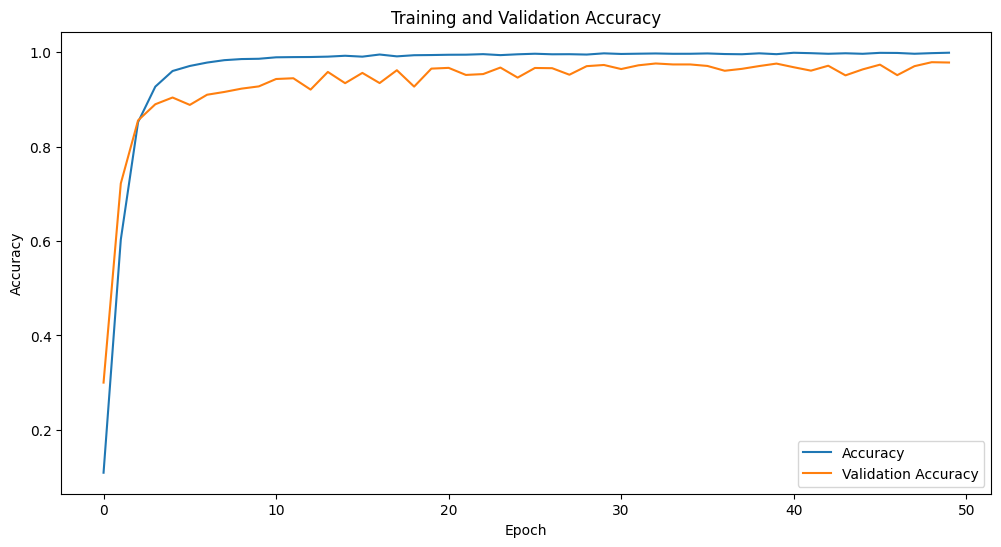

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assume y_pred is obtained from your model like so:
# y_pred = model.predict_classes(X_test_gray_norm) if using TensorFlow 1.x or for 2.x:
y_pred = np.argmax(model.predict(X_test_gray_norm), axis=-1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score using 'macro' averaging which calculates metrics for each label, and find their unweighted mean.
# This does not take label imbalance into account.
try:
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
except ValueError as e:
    print(f"Error calculating metrics: {e}")
    # This block can be used to handle missing classes or other scoring errors
    # You might need to investigate the classes in y_test and y_pred or adjust the averaging method


395/395 [==============================] - 4s 8ms/step
Accuracy: 0.9494853523357086
Precision: 0.915629756238814
Recall: 0.9219861598069381
F1-score: 0.9158395344864341


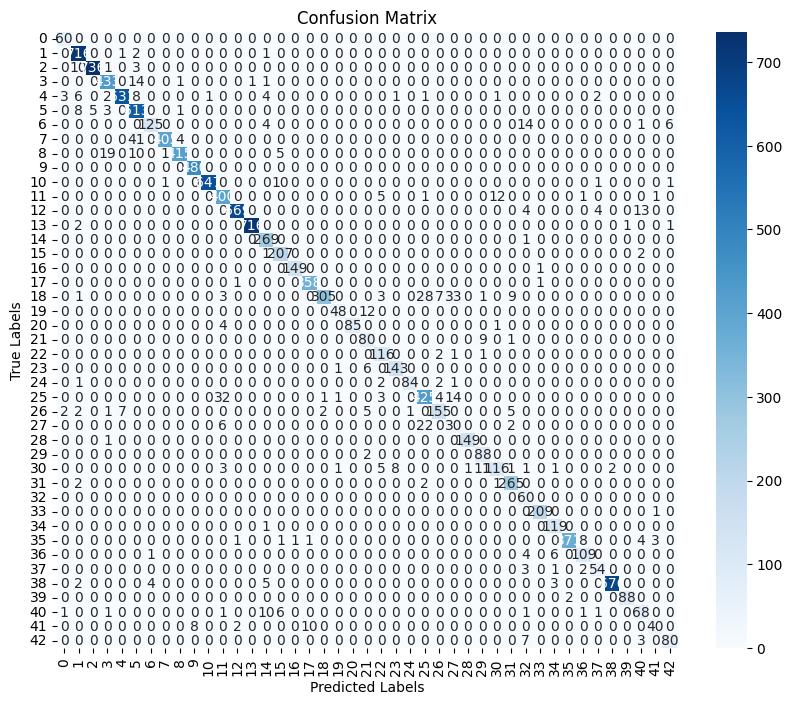

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()